In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import sys

sys.path.append("../../scripts")
from LSTM import PortfolioPredicitionsLSTM_value
from LSTM_utils import compute_errors

# Import des données

In [2]:
titres = {"Amazon": pd.read_csv("../../data/AMZN.csv"),
          "Berkshire": pd.read_csv("../../data/BRK-B.csv"),
          "Google": pd.read_csv("../../data/GOOG.csv"),
          "Microsoft": pd.read_csv("../../data/MSFT.csv"),
          "Exxon": pd.read_csv("../../data/XOM.csv")}

# Modélisation

In [3]:
LSTM = PortfolioPredicitionsLSTM_value(titres, 
                                       n_steps = 30, 
                                       epochs = 50, 
                                       horizon_prev = 7, 
                                       test_size = 0.8)

In [4]:
predictions, ptf_avg = LSTM.predict_avg_portfolio()

100%|██████████| 5/5 [27:15<00:00, 327.14s/it]


# Résultats

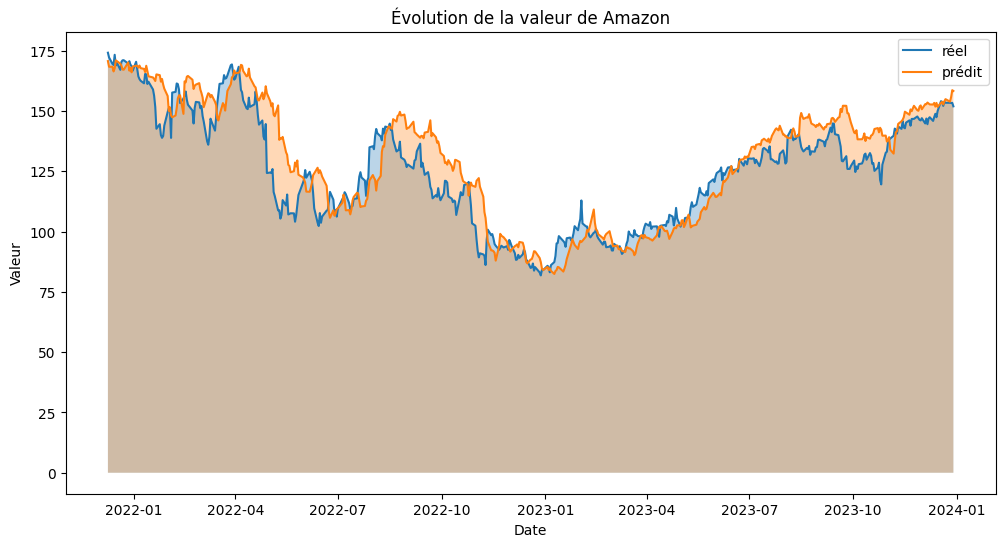

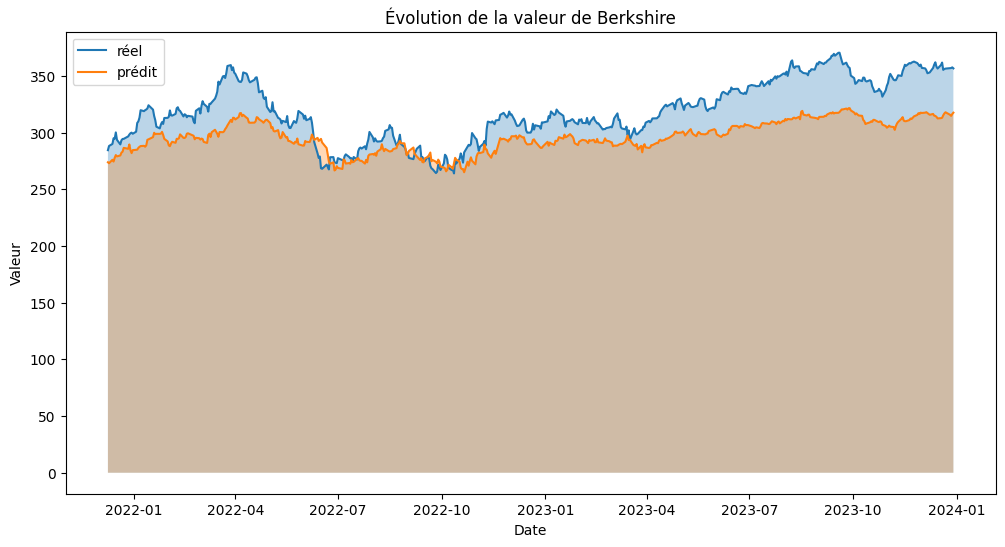

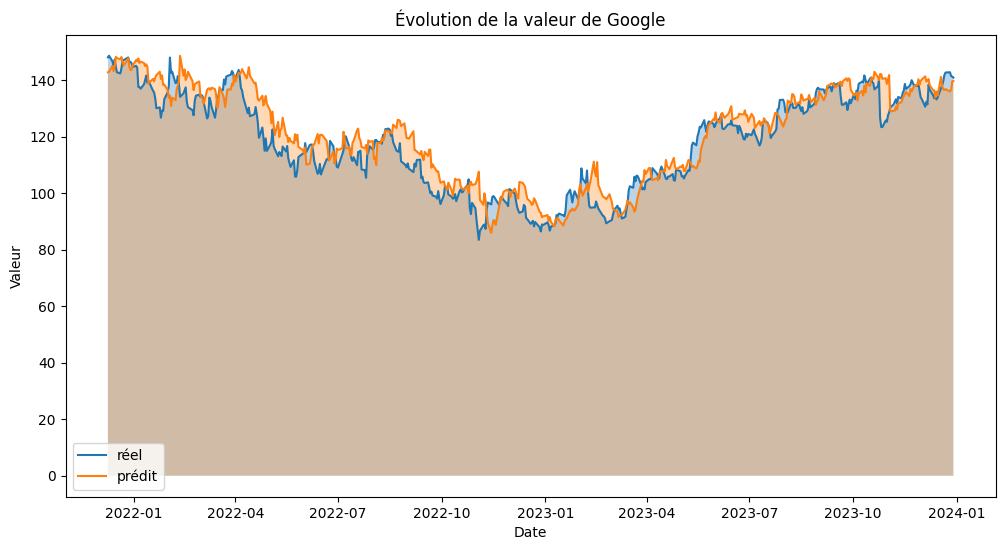

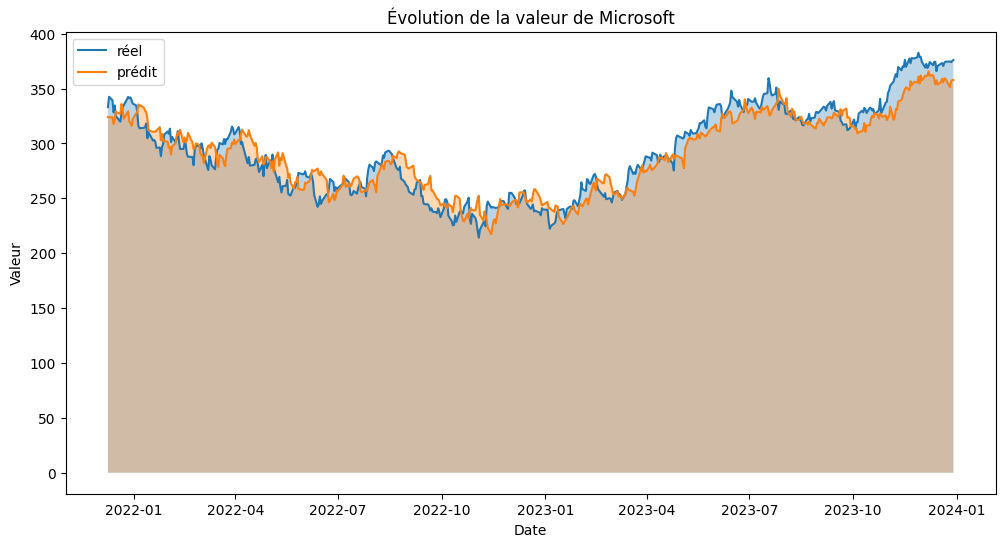

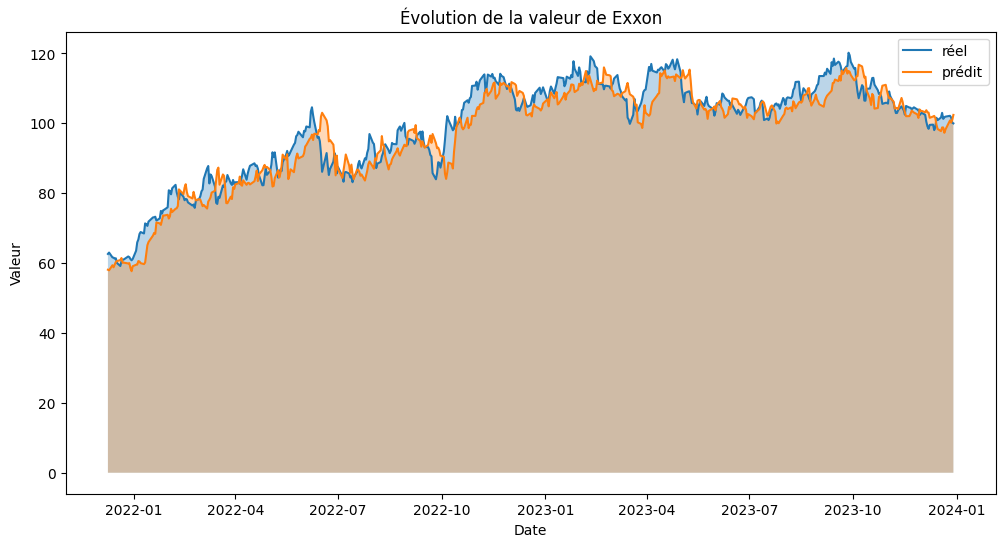

In [9]:
for key, value in predictions.items() :
    fig = plt.figure(figsize=(12, 6))
    
    # Plot the 'Close' values
    plt.plot(value.Date, value['Close'], label='réel')
    plt.fill_between(value.Date, value['Close'], alpha=0.3)
    
    # Plot the 'Prediction' values
    plt.plot(value.Date, value['Prediction'], label='prédit')
    plt.fill_between(value.Date, value['Prediction'], alpha=0.3)
    
    # Set the title and axis labels
    plt.title(f"Évolution de la valeur de {key}")
    plt.xlabel('Date')
    plt.ylabel('Valeur')
    
    # Add a legend
    plt.legend()
    
    # Show the plot
    plt.show()

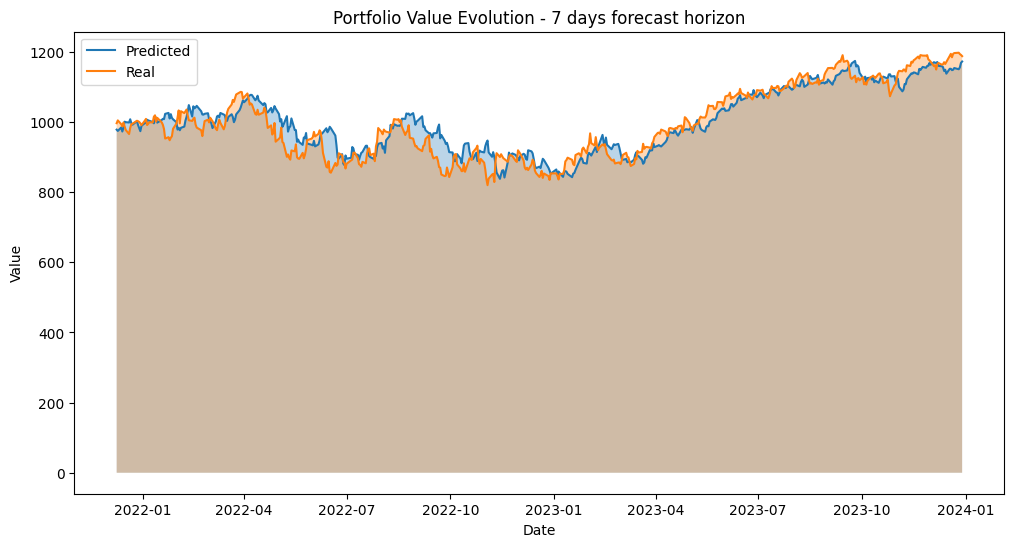

In [12]:
fig = plt.figure(figsize=(12, 6))

plt.plot(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], label='Predicted')
plt.fill_between(ptf_avg.Date, ptf_avg['Predicted_Portfolio_Value'], alpha=0.3)

plt.plot(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], label='Real')
plt.fill_between(ptf_avg.Date, ptf_avg['Real_Portfolio_Value'], alpha=0.3)

plt.title(f"Portfolio Value Evolution - 7 days forecast horizon")
plt.xlabel('Date')
plt.ylabel('Value')

plt.legend()
plt.show()

# Erreurs

In [7]:
errors = compute_errors(predictions, ptf_avg)

In [8]:
errors

,MSE,RMSE,MAE
Portfolio,1420.749486,37.692831,29.532566
Amazon,122.123177,11.050936,8.328234
Berkshire,747.396362,27.338551,23.774798
Google,45.077739,6.713996,5.296722
Microsoft,188.050427,13.713148,11.387636
Exxon,22.838565,4.778971,3.852489
